# Impor Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow.keras
import csv
import sklearn
import seaborn as sns
import time


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import recall_score, accuracy_score, f1_score, plot_roc_curve, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from itertools import product
from pathlib import Path

# Plotting options
%matplotlib inline

np.set_printoptions(precision=3)


import warnings
warnings.filterwarnings('ignore')

# Impor Data

In [2]:
df = pd.read_csv('./creditcard.csv')

# Memahami Data

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print('Jumlah Null : ',df.isnull().sum().sum())
print('Jumlah Na   : ',df.isna().sum().sum())

Jumlah Null :  0
Jumlah Na   :  0


Transaksi Normal (0) =  284315    99.83 % dari jumlah transaksi
Transaksi Fraud  (1) =  492  ||  0.17 % dari jumlah transaksi


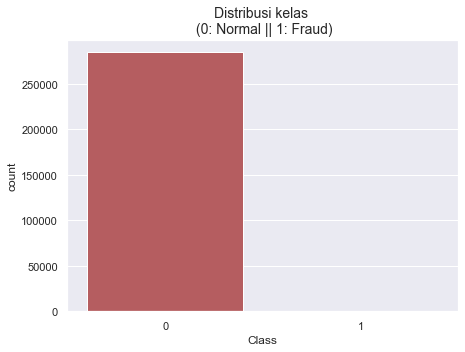

In [7]:
print('Transaksi Normal (0) = ', df['Class'].value_counts()[0], '  ', round(df['Class'].value_counts()[0]/len(df)*100,2), '% dari jumlah transaksi')
print('Transaksi Fraud  (1) = ', df['Class'].value_counts()[1], ' || ', round(df['Class'].value_counts()[1]/len(df)*100,2), '% dari jumlah transaksi')

sns.set(rc={'figure.figsize': (7,5)})
colors = ["r", "b"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Distribusi kelas \n (0: Normal || 1: Fraud)', fontsize=14)
plt.savefig('distribusi.png',dpi=300)

# Membersihkan dan Mentransformasi Data

In [8]:
df.loc[:,'Time'] = df.Time / 3600

In [9]:
print(df['Time'])

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time, Length: 284807, dtype: float64


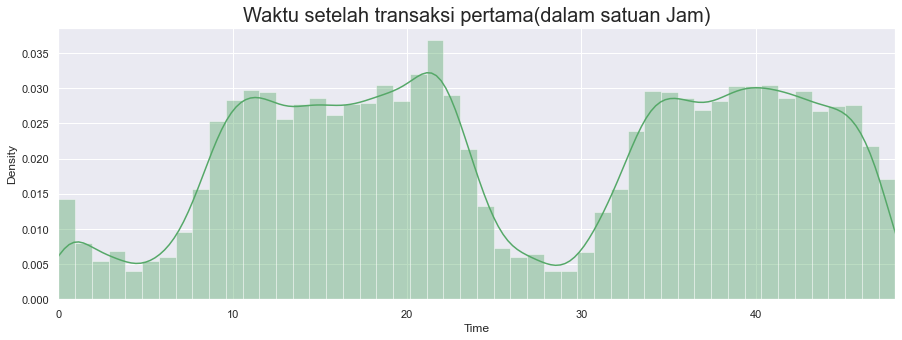

In [10]:
sns.set(rc={'figure.figsize': (15,5)})
fig = sns.distplot(df['Time'], kde=True, color='g')
plt.xlim([0,48])
plt.title('Waktu setelah transaksi pertama(dalam satuan Jam)',fontsize=20)
plt.savefig('time.png',dpi=300)

In [11]:
df.Amount = StandardScaler().fit_transform(df.Amount.values.reshape(-1, 1))

In [12]:
print(df['Amount'])

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64


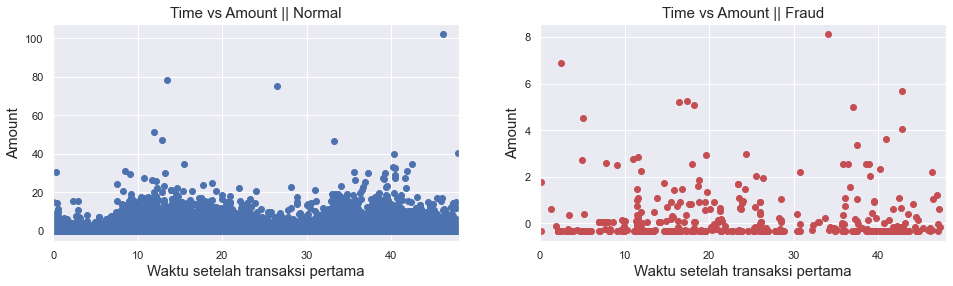

In [13]:
sns.set(rc={'figure.figsize': (16,4)})
plt.subplot(1,2,1)
fig = plt.scatter(x=df[df['Class'] == 0]['Time'], y=df[df['Class'] == 0]['Amount'], color='b')
plt.xlabel('Waktu setelah transaksi pertama', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Time vs Amount || Normal',fontsize=15)
plt.xlim([0,48])

plt.subplot(1,2,2)
fig = plt.scatter(x=df[df['Class'] == 1]['Time'], y=df[df['Class'] == 1]['Amount'], color='r')
plt.xlabel('Waktu setelah transaksi pertama', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Time vs Amount || Fraud',fontsize=15)
plt.xlim([0,48])

plt.savefig('time_vs_amount.png',dpi=300)

# Memecah Data

In [14]:
X = df.iloc[:,:-1]
y = df.Class

In [15]:
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475


In [16]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
#split : 20% data tes dan 80% data train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [18]:

df_ytrain = pd.DataFrame(y_train, columns=['number','Class'])
df_ytes = pd.DataFrame(y_test, columns=['number','Class'])
print('jumlah data train :', len(X_train))
print('banyak fraud(0) pada data train :', df_ytrain['Class'].value_counts()[0])
print('banyak fraud(1) pada data train :', df_ytrain['Class'].value_counts()[1])
print('jumlah data tes :', len(X_test))
print('banyak fraud(0) pada data tes :', df_ytes['Class'].value_counts()[0])
print('banyak fraud(1) pada data tes :', df_ytes['Class'].value_counts()[1])

jumlah data train : 227845
banyak fraud(0) pada data train : 227454
banyak fraud(1) pada data train : 391
jumlah data tes : 56962
banyak fraud(0) pada data tes : 56861
banyak fraud(1) pada data tes : 101


Transaksi Normal (0) =  227454    99.83 % dari jumlah transaksi
Transaksi Fraud  (1) =  391  ||  0.17 % dari jumlah transaksi


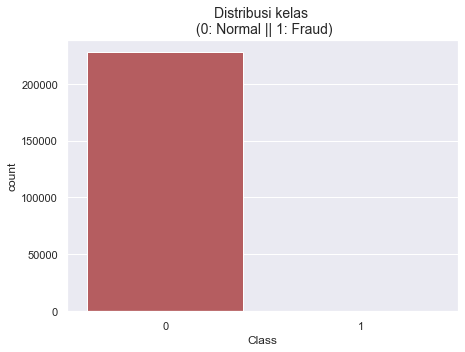

In [19]:
print('Transaksi Normal (0) = ', df_ytrain['Class'].value_counts()[0], '  ', round(df_ytrain['Class'].value_counts()[0]/len(df_ytrain)*100,2), '% dari jumlah transaksi')
print('Transaksi Fraud  (1) = ', df_ytrain['Class'].value_counts()[1], ' || ', round(df_ytrain['Class'].value_counts()[1]/len(df_ytrain)*100,2), '% dari jumlah transaksi')

sns.set(rc={'figure.figsize': (7,5)})
colors = ["r", "b"]
sns.countplot('Class', data=df_ytrain, palette=colors)
plt.title('Distribusi kelas \n (0: Normal || 1: Fraud)', fontsize=14)
plt.savefig('data_train.png',dpi=300)

# Oversampling dengan SMOTE

In [20]:
X_resample, y_resample = SMOTE().fit_resample(X_train,y_train.values.ravel())

In [21]:
print('Total data train sebelum SMOTE oversampling: ', len(y_train), '...dan setelah SMOTE oversampling: ', len(y_resample))
print('Total transaksi fraud pada data train sebelum SMOTE oversampling: ', len(y_train[y_train==1]), 
      '...dan setelah SMOTE oversampling: ', len(y_resample[y_resample==1]))
print('Total transaksi normal pada data train sebelum SMOTE oversampling: ', len(y_train[y_train==0]), 
      '...dan setelah SMOTE oversampling: ', len(y_resample[y_resample==0]))

Total data train sebelum SMOTE oversampling:  227845 ...dan setelah SMOTE oversampling:  454908
Total transaksi fraud pada data train sebelum SMOTE oversampling:  391 ...dan setelah SMOTE oversampling:  227454
Total transaksi normal pada data train sebelum SMOTE oversampling:  227454 ...dan setelah SMOTE oversampling:  227454


In [22]:
dfsmote = pd.DataFrame(X_resample, y_resample)
dfsmote['Class'] = y_resample
dfsmote.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,14.763889,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.301454,0
0,14.763889,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.301454,0
0,14.763889,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.301454,0
0,14.763889,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.301454,0
0,14.763889,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.301454,0


Transaksi Normal (0) =  227454    50.0 % dari jumlah transaksi
Transaksi Fraud  (1) =  227454  ||  50.0 % dari jumlah transaksi


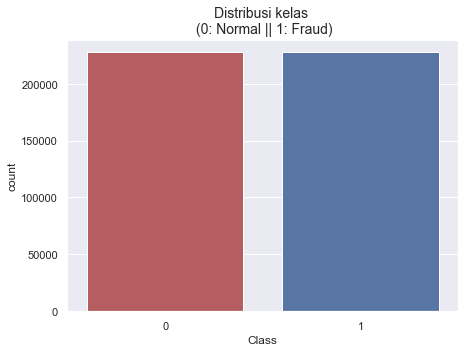

In [23]:
print('Transaksi Normal (0) = ', dfsmote['Class'].value_counts()[0], '  ', round(dfsmote['Class'].value_counts()[0]/len(dfsmote)*100,2), '% dari jumlah transaksi')
print('Transaksi Fraud  (1) = ', dfsmote['Class'].value_counts()[1], ' || ', round(dfsmote['Class'].value_counts()[1]/len(dfsmote)*100,2), '% dari jumlah transaksi')

sns.set(rc={'figure.figsize': (7,5)})
colors = ["r", "b"]
sns.countplot('Class', data=dfsmote, palette=colors)
plt.title('Distribusi kelas \n (0: Normal || 1: Fraud)', fontsize=14)
plt.savefig('data_train_smote.png',dpi=300)

# Model dengan Default Parameter

## Decision Tree

### 1. Decision Tree - Imbalance Data

In [24]:
DT = DecisionTreeClassifier()

In [25]:
start_time = time.time()
DT.fit(X_train, y_train)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 31.931859970092773 detik ---


In [26]:
start_time = time.time()
y_pred_dt = DT.predict(X_test)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 0.045974016189575195 detik ---


Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.76      0.77      0.77       101

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.8859
MCC Score : 0.7681


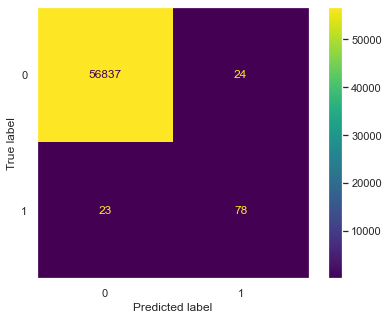

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.grid(False)
plt.savefig('cm_dt.png',dpi=300)
print('Decision Tree')
print(classification_report(y_test, y_pred_dt))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_dt))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_dt))

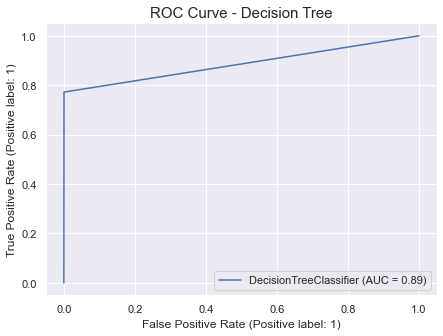

In [28]:
plot_roc_curve(DT, X_test, y_test)
plt.title('ROC Curve - Decision Tree',fontsize=15)
plt.savefig('roc_dt.png',dpi=300)

### 2. Decision Tree - Balanced Data

In [29]:
start_time = time.time()
DT.fit(X_resample, y_resample)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 73.1761245727539 detik ---


In [30]:
start_time = time.time()
y_pred_dt_smote = DT.predict(X_test)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 0.03298330307006836 detik ---


Decision Tree + SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.43      0.79      0.56       101

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.8951
MCC Score : 0.5812


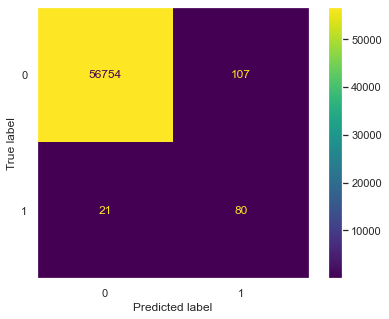

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_smote)
plt.grid(False)
plt.savefig('cm_dt_smote.png',dpi=300)
print('Decision Tree + SMOTE')
print(classification_report(y_test, y_pred_dt_smote))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_dt_smote))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_dt_smote))

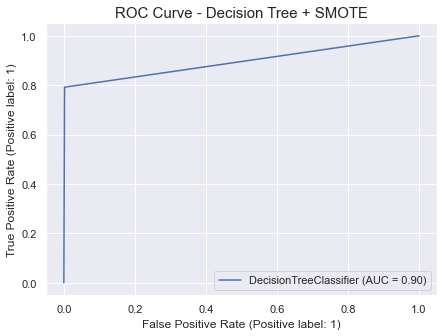

In [32]:
plot_roc_curve(DT, X_test, y_test)
plt.title('ROC Curve - Decision Tree + SMOTE',fontsize=15)
plt.savefig('roc_dt_smote.png',dpi=300)

## Random Forest 

### 1. Random Forest - Imbalance Data

In [33]:
RF = RandomForestClassifier()

In [34]:
start_time = time.time()
RF.fit(X_train, y_train)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 398.015820980072 detik ---


In [35]:
start_time = time.time()
y_pred_rf = RF.predict(X_test)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 1.4301824569702148 detik ---


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.8910
MCC Score : 0.8474


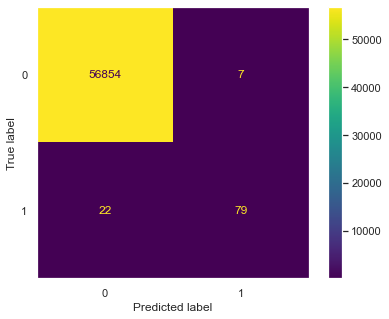

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.grid(False)
plt.savefig('cm_rf.png',dpi=300)
print('Random Forest')
print(classification_report(y_test, y_pred_rf))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_rf))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_rf))

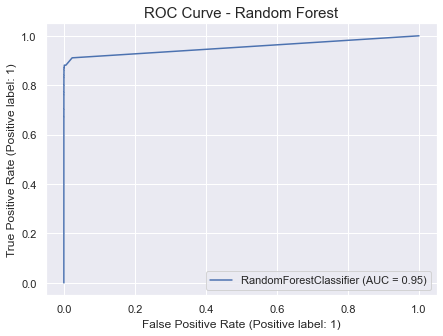

In [37]:
plot_roc_curve(RF, X_test, y_test)
plt.title('ROC Curve - Random Forest',fontsize=15)
plt.savefig('roc_rf.png',dpi=300)

### 2. Random Forest - balanced data

In [38]:
start_time = time.time()
RF.fit(X_resample, y_resample)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 674.3244106769562 detik ---


In [39]:
start_time = time.time()
y_pred_rf_smote = RF.predict(X_test)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 1.661067008972168 detik ---


Random Forest + SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.87      0.84      0.85       101

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.9207
MCC Score : 0.8541


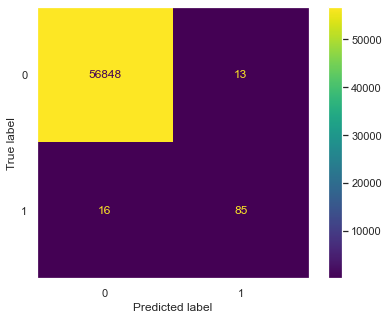

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_smote)
plt.grid(False)
plt.savefig('cm_rf_smote.png',dpi=300)
print('Random Forest + SMOTE')
print(classification_report(y_test, y_pred_rf_smote))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_rf_smote))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_rf_smote))

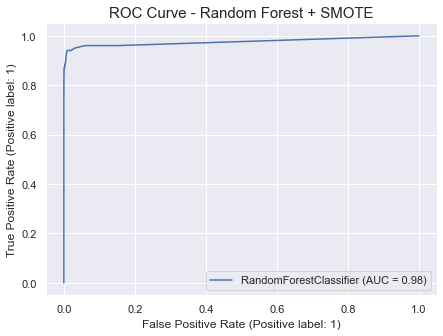

In [41]:
plot_roc_curve(RF, X_test, y_test)
plt.title('ROC Curve - Random Forest + SMOTE',fontsize=15)
plt.savefig('roc_rf_smote.png',dpi=300)

## Logistic Regression 

### 1. Logistic Regression - Imblance Data

In [42]:
LogR = LogisticRegression()

In [43]:
start_time = time.time()
LogR.fit(X_train, y_train)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 4.3424296379089355 detik ---


In [44]:
start_time = time.time()
y_pred_lr = LogR.predict(X_test)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 0.01499176025390625 detik ---


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.8168
MCC Score : 0.7450


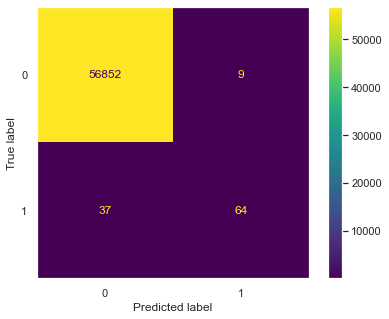

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.grid(False)
plt.savefig('cm_lr.png',dpi=300)
print('Logistic Regression')
print(classification_report(y_test, y_pred_lr))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_lr))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_lr))

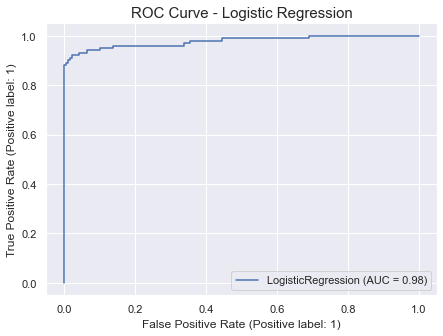

In [46]:
plot_roc_curve(LogR, X_test, y_test)
plt.title('ROC Curve - Logistic Regression',fontsize=15)
plt.savefig('roc_lr.png',dpi=300)

### 2. Logistic Regression - Balanced Data 

In [47]:
start_time = time.time()
LogR.fit(X_resample, y_resample)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 7.974429130554199 detik ---


In [48]:
start_time = time.time()
y_pred_lr_smote = LogR.predict(X_test)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 0.012993335723876953 detik ---


Logistic Regression + SMOTE
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC Score : 0.9578
MCC Score : 0.2396


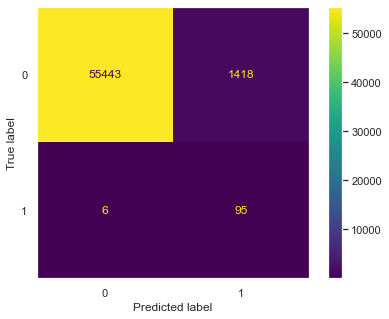

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_smote)
plt.grid(False)
plt.savefig('cm_lr_smote.png',dpi=300)
print('Logistic Regression + SMOTE')
print(classification_report(y_test, y_pred_lr_smote))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_lr_smote))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_lr_smote))

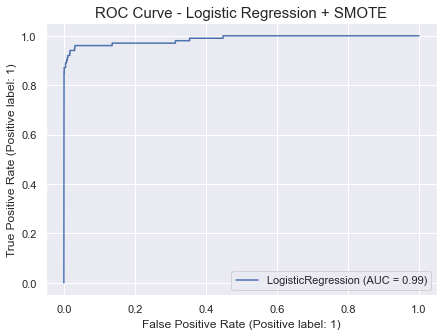

In [50]:
plot_roc_curve(LogR, X_test, y_test)
plt.title('ROC Curve - Logistic Regression + SMOTE',fontsize=15)
plt.savefig('roc_lr_smote.png',dpi=300)

## Support Vector Machine / Support Vector Classifier

### 1. SVM - Imbalance Data

In [51]:
SVM = SVC()

In [52]:
start_time = time.time()
SVM.fit(X_train, y_train)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 41.45523643493652 detik ---


In [53]:
start_time = time.time()
y_pred_svm = SVM.predict(X_test)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 8.416175127029419 detik ---


Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.82      0.82      0.82       101

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.9107
MCC Score : 0.8215


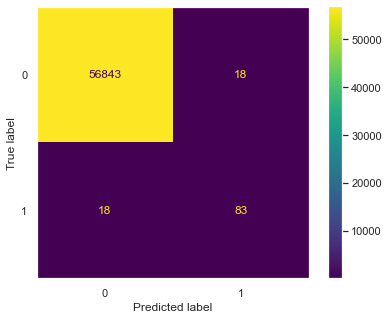

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.grid(False)
plt.savefig('cm_svm.png',dpi=300)
print('Support Vector Machine')
print(classification_report(y_test, y_pred_svm))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_svm))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_svm))

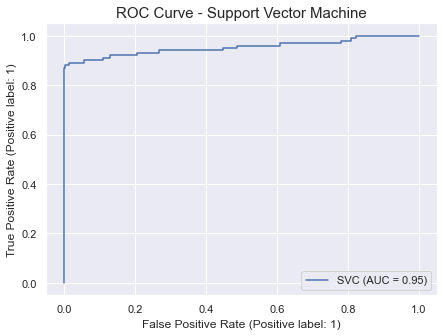

In [55]:
plot_roc_curve(SVM, X_test, y_test)
plt.title('ROC Curve - Support Vector Machine',fontsize=15)
plt.savefig('roc_svm.png',dpi=300)

### 2. SVM - Balanced Data 

In [56]:
start_time = time.time()
SVM.fit(X_resample, y_resample)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 4162.762876033783 detik ---


In [57]:
start_time = time.time()
y_pred_svm_smote = SVM.predict(X_test)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 726.1586949825287 detik ---


Support Vector Machine + SMOTE
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.08      0.91      0.15       101

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.57     56962
weighted avg       1.00      0.98      0.99     56962

ROC Score : 0.9466
MCC Score : 0.2732


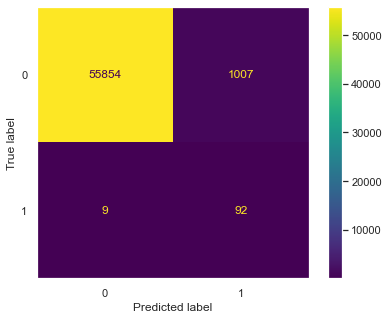

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_smote)
plt.grid(False)
plt.savefig('cm_svm_smote.png',dpi=300)
print('Support Vector Machine + SMOTE')
print(classification_report(y_test, y_pred_svm_smote))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_svm_smote))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_svm_smote))

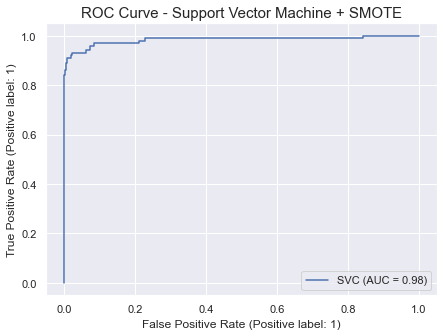

In [59]:
plot_roc_curve(SVM, X_test, y_test)
plt.title('ROC Curve - Support Vector Machine + SMOTE',fontsize=15)
plt.savefig('roc_svm_smote.png',dpi=300)

# Model dengan Best Params

### 1. Decision Tree Best Params - Imbalance Data

In [60]:
dt_parameter = {'criterion': ['gini', 'entropy'],
                'max_depth': list(range(2,6,1)),
                'min_samples_leaf': list(range(5,10,1))}

In [61]:
grid_dt = GridSearchCV(DT, dt_parameter)
start_time = time.time()
grid_dt.fit(X_train, y_train)
print("Waktu yang dibutuhkan oleh Model: --- %s ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 1505.6200051307678 ---


In [84]:
print(grid_dt.best_score_)
print(grid_dt.best_estimator_)
print(grid_dt.best_params_)

0.9994557703702078
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7)
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7}


In [85]:
dt_clf = grid_dt.best_estimator_

In [86]:
y_pred_dt_param = dt_clf.predict(X_test)

Decision Tree + Params
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.74      0.81       101

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.8712
MCC Score : 0.8140


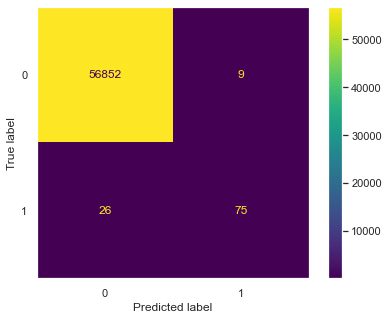

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_param)
plt.grid(False)
plt.savefig('cm_dt_params.png',dpi=300)
print('Decision Tree + Params')
print(classification_report(y_test, y_pred_dt_param))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_dt_param))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_dt_param))

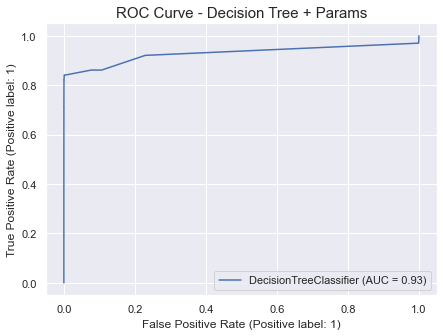

In [89]:
plot_roc_curve(dt_clf, X_test, y_test)
plt.title('ROC Curve - Decision Tree + Params',fontsize=15)
plt.savefig('roc_dt_params.png',dpi=300)

### 2. Decision Tree Best Params - Balanced Data

In [63]:
grid_dt_smote = GridSearchCV(DT, dt_parameter)
start_time = time.time()
grid_dt_smote.fit(X_resample, y_resample)
print("Waktu yang dibutuhkan oleh Model: --- %s detik ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 3017.020665884018 detik ---


In [90]:
print(grid_dt_smote.best_score_)
print(grid_dt_smote.best_estimator_)
print(grid_dt_smote.best_params_)

0.9496425577242004
DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7}


In [91]:
dt_smote_clf = grid_dt_smote.best_estimator_

In [92]:
y_pred_dt_param_smote = dt_smote_clf.predict(X_test)

Decision Tree + Params + SMOTE
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.05      0.88      0.09       101

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC Score : 0.9255
MCC Score : 0.2046


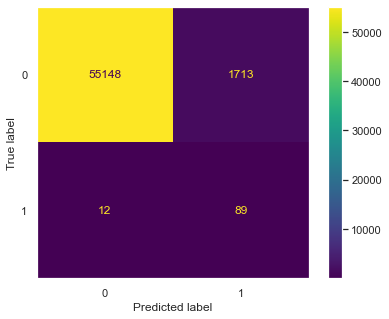

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_param_smote)
plt.grid(False)
plt.savefig('cm_dt_params_smote.png',dpi=300)
print('Decision Tree + Params + SMOTE')
print(classification_report(y_test, y_pred_dt_param_smote))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_dt_param_smote))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_dt_param_smote))

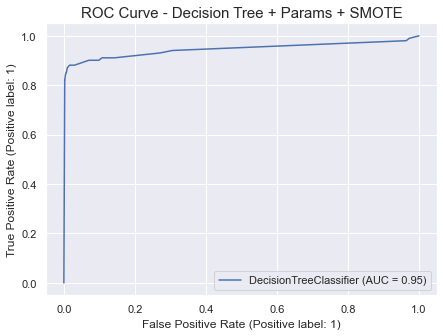

In [94]:
plot_roc_curve(dt_smote_clf, X_test, y_test)
plt.title('ROC Curve - Decision Tree + Params + SMOTE',fontsize=15)
plt.savefig('roc_dt_params_smote.png',dpi=300)

## Random Forest - Best Parameter

### 1. Random Forest Best Params - Imbalanced Data

In [69]:
rf_parameter = {'max_depth': [60, 80, 100],
               'max_features': ['none','sqrt','log2'],
               'n_estimators': [100, 150, 200],
               'n_jobs': [-1],
               'random_state': [42]}

In [70]:
grid_rf = GridSearchCV(RF, rf_parameter)
start_time = time.time()
grid_rf.fit(X_train, y_train)
print("Waktu yang dibutuhkan oleh Model: --- %s ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 14729.602887868881 ---


In [95]:
rf_clf = grid_rf.best_estimator_

In [96]:
y_pred_rf_param = rf_clf.predict(X_test)

Random Forest + Params
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.74      0.82       101

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.8712
MCC Score : 0.8239


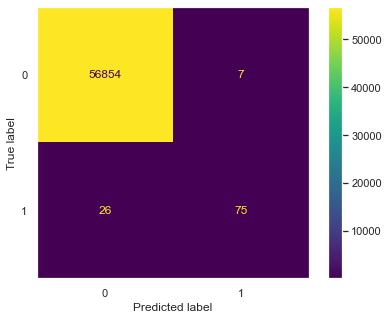

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_param)
plt.grid(False)
plt.savefig('cm_rf_params.png', dpi=300)
print('Random Forest + Params')
print(classification_report(y_test, y_pred_rf_param))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_rf_param))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_rf_param))

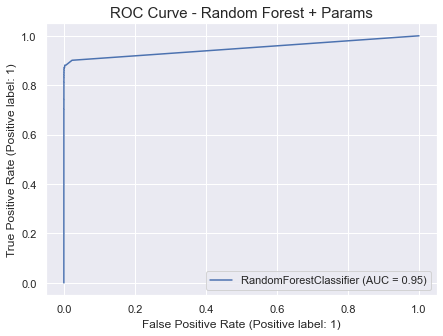

In [101]:
plot_roc_curve(rf_clf, X_test, y_test)
plt.title('ROC Curve - Random Forest + Params', fontsize=15)
plt.savefig('roc_rf_params.png', dpi=300)

### 2. Random Forest Best Params - Balanced Data

In [72]:
grid_rf_smote = GridSearchCV(RF, rf_parameter)
start_time = time.time()
grid_rf_smote.fit(X_resample, y_resample)
print("Waktu yang dibutuhkan oleh Model: --- %s ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 25538.75603556633 ---


In [102]:
rf_smote_clf = grid_rf_smote.best_estimator_

In [103]:
y_pred_rf_param_smote = rf_smote_clf.predict(X_test)

Random Forest + Params + SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.84      0.87       101

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.9207
MCC Score : 0.8675


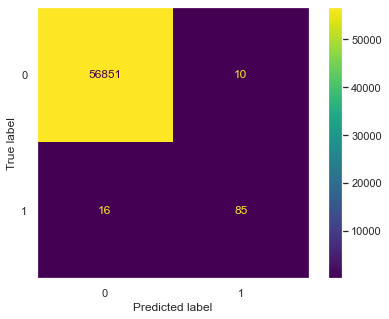

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_param_smote)
plt.grid(False)
plt.savefig('cm_rf_params_smote.png',dpi=300)
print('Random Forest + Params + SMOTE')
print(classification_report(y_test, y_pred_rf_param_smote))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_rf_param_smote))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_rf_param_smote))

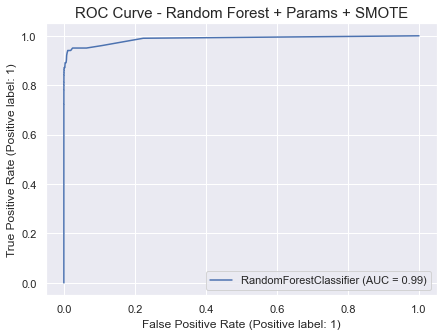

In [105]:
plot_roc_curve(rf_smote_clf, X_test, y_test)
plt.title('ROC Curve - Random Forest + Params + SMOTE', fontsize=15)
plt.savefig('roc_rf_params_smote.png',dpi=300)

## Logistic Regression - Best Parameter

### 1. Logistic Regression Best Params -Imbalance Data

In [74]:
lr_parameter = {'penalty': ['l1', 'l2'],
               'C': [0.01, 0.1, 1, 10, 100],
               'max_iter': [100, 1000, 10000],
               'solver': ['liblinear', 'saga'],
               'tol': [100, 1000, 10000]}

In [75]:
grid_lr = GridSearchCV(LogR, lr_parameter)
start_time = time.time()
grid_lr.fit(X_train, y_train)
print("Waktu yang dibutuhkan oleh Model: --- %s ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 431.3858323097229 ---


In [106]:
lr_clf = grid_lr.best_estimator_

In [107]:
y_pred_lr_param = lr_clf.predict(X_test)

Logistic Regression + Params
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.72      0.43      0.53       101

    accuracy                           1.00     56962
   macro avg       0.86      0.71      0.77     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.7127
MCC Score : $0.4f


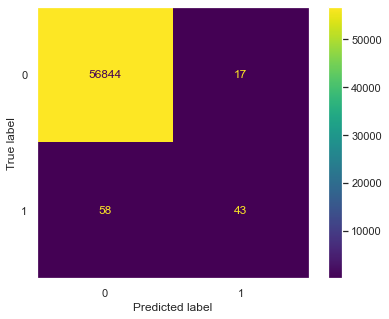

In [108]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_param)
plt.grid(False)
plt.savefig('cm_lr_params.png', dpi=300)
print('Logistic Regression + Params')
print(classification_report(y_test, y_pred_lr_param))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_lr_param))
print('MCC Score : $0.4f'% matthews_corrcoef(y_test, y_pred_lr_param))

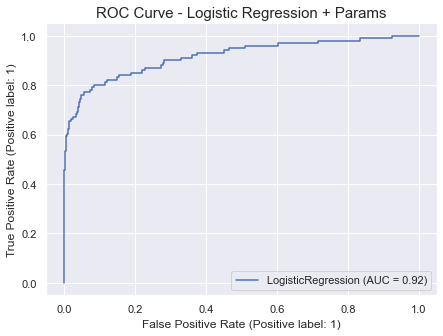

In [109]:
plot_roc_curve(lr_clf, X_test, y_test)
plt.title('ROC Curve - Logistic Regression + Params', fontsize=15)
plt.savefig('roc_lr_params.png', dpi=300)

### 2. Logistic Regression Best Params - Balanced Data

In [77]:
grid_lr_smote = GridSearchCV(LogR, lr_parameter)
start_time = time.time()
grid_lr_smote.fit(X_resample, y_resample)
print("Waktu yang dibutuhkan oleh Model: --- %s ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model: --- 743.7132244110107 ---


In [110]:
lr_smote_clf = grid_lr_smote.best_estimator_

In [111]:
y_pred_lr_param_smote = lr_smote_clf.predict(X_test)

Logistic Regression + Params + SMOTE
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.06      0.94      0.11       101

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC Score : 0.9573
MCC Score : 0.2352


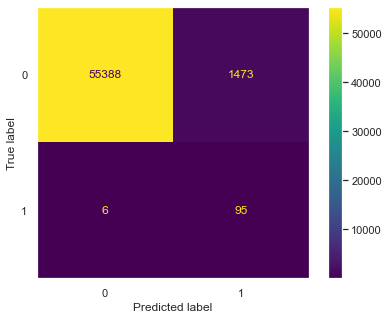

In [112]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_param_smote)
plt.grid(False)
plt.savefig('cm_lr_params_smote.png', dpi=300)
print('Logistic Regression + Params + SMOTE')
print(classification_report(y_test, y_pred_lr_param_smote))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_lr_param_smote))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_lr_param_smote))

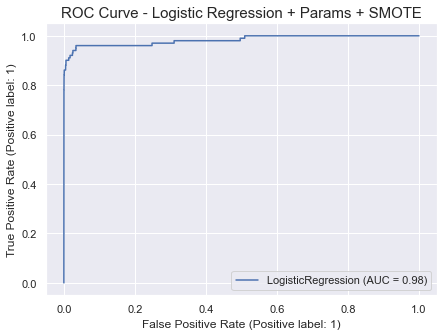

In [113]:
plot_roc_curve(lr_smote_clf, X_test, y_test)
plt.title('ROC Curve - Logistic Regression + Params + SMOTE', fontsize=15)
plt.savefig('roc_lr_params_smote.png',dpi=300)

## SVM - Best Parameter

### 1. SVM Best Params - Imbalanced Data

In [79]:
svm_parameter = {'C':[0.5, 0.7, 0.9, 0.1],
                 'kernel':['rbf', 'poly', 'sigmoid', 'linear']}

In [81]:
grid_svm = GridSearchCV(SVM, svm_parameter)
start_time = time.time()
grid_svm.fit(X_train, y_train)
print("Waktu yang dibutuhkan oleh Model : --- %s ---" % (time.time() - start_time))

Waktu yang dibutuhkan oleh Model : --- 49084.19786810875 ---


In [114]:
svm_clf = grid_svm.best_estimator_

In [116]:
y_pred_svm_param = svm_clf.predict(X_test)

Logistic Regression + Params
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.82      0.82      0.82       101

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC Score : 0.9107
MCC Score : 0.8215


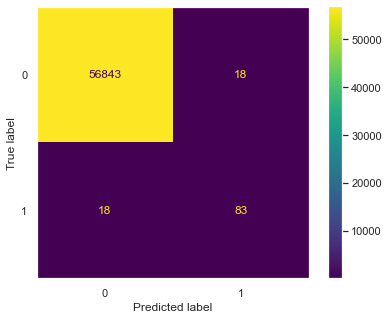

In [117]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_param)
plt.grid(False)
plt.savefig('cm_svm_params.png',dpi=300)
print('Logistic Regression + Params')
print(classification_report(y_test, y_pred_svm_param))
print('ROC Score : %0.4f'% roc_auc_score(y_test, y_pred_svm_param))
print('MCC Score : %0.4f'% matthews_corrcoef(y_test, y_pred_svm_param))

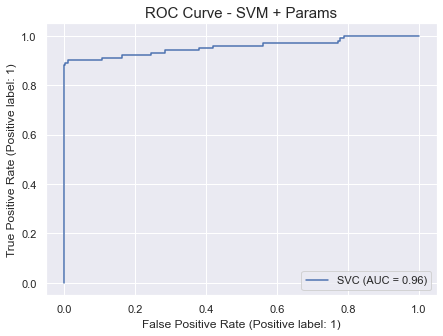

In [118]:
plot_roc_curve(svm_clf, X_test, y_test)
plt.title('ROC Curve - SVM + Params', fontsize=15)
plt.savefig('roc_svm_params.png',dpi=300)

### 2. SVM Best Params - Balanced Data

In [ ]:
grid_svm_smote = GridSearchCV(SVM, svm_parameter)
start_time = time.time()
grid_svm_smote.fit(X_resample, y_resample)
print("Waktu yang dibutuhkan oleh Model: --- %s ---" % (time.time() - start_time))

In [ ]:
svm_smote_clf = grid_svm_smote.best_estimator_
svm_smote_clf